# Movies - Correlation Project

### Importing Libraries/Getting set up

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusting the size of the plots 

In [2]:
#I want to be able to see all of the data in our dataframe
pd.set_option('display.max_rows', None)

### Importing Data

In [3]:
#read in CSV file
df = pd.read_csv('movies.csv',parse_dates=['released'])
    #ensuring that 'released' column is recognized as a date object

### Getting familiar with the data

In [4]:
#taking a peek at the data
df.head()

#NOTE: The 'year' column is incorrect - some values don't match the year in the 'released' column
    #created a 'year_new' column to use in Excel

,name,rating,genre,year,released,year_new,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#data types in dataset
df.dtypes
#Many of the float columns could be converted to integers as well (for cleanliness)
    #votes, budget, gross

name                object
rating              object
genre               object
year                 int64
released    datetime64[ns]
year_new             int64
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
dtype: object

In [6]:
df.info()
#Looks like some columns are missing quite a lot of values 
    #Notably the 'budget' column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      7668 non-null   object        
 1   rating    7591 non-null   object        
 2   genre     7668 non-null   object        
 3   year      7668 non-null   int64         
 4   released  7666 non-null   datetime64[ns]
 5   year_new  7668 non-null   int64         
 6   score     7665 non-null   float64       
 7   votes     7665 non-null   float64       
 8   director  7668 non-null   object        
 9   writer    7665 non-null   object        
 10  star      7667 non-null   object        
 11  country   7665 non-null   object        
 12  budget    5497 non-null   float64       
 13  gross     7479 non-null   float64       
 14  company   7651 non-null   object        
 15  runtime   7664 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(8)
memory

### Cleaning the data

In [7]:
#Need to deal with null values in dataset
    #Let's get a feel for the % of null values for each column
    
for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull())*100,2)
    print('{} - {}%'.format(col,pct_missing))
    
#Ok, over a quarter of the 'budget' column contains missing values 

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
year_new - 0.0%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [8]:
#I don't want to drop all of the null rows since that will result in a LOT of useful data being eliminated
    #Instead, I'll start with the 'budget' column and fill all NA values to 0

#I'm also going to update all NA values the 'gross' column to 0

df['budget'].fillna(value = 0, inplace = True)
df['gross'].fillna(value = 0, inplace = True)

In [9]:
#The remaining columns have null values but they amount to 1% or less
    #I'm comfortable with dropping these null rows altogether 
    
df.dropna(inplace=True)

In [10]:
#All null values have been dealt with
    #Now we can change some data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7574 entries, 0 to 7659
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      7574 non-null   object        
 1   rating    7574 non-null   object        
 2   genre     7574 non-null   object        
 3   year      7574 non-null   int64         
 4   released  7574 non-null   datetime64[ns]
 5   year_new  7574 non-null   int64         
 6   score     7574 non-null   float64       
 7   votes     7574 non-null   float64       
 8   director  7574 non-null   object        
 9   writer    7574 non-null   object        
 10  star      7574 non-null   object        
 11  country   7574 non-null   object        
 12  budget    7574 non-null   float64       
 13  gross     7574 non-null   float64       
 14  company   7574 non-null   object        
 15  runtime   7574 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(8)
memory

In [11]:
#changing the data type of 'float' columns to 'integer'
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [12]:
#As noted earlier - the original 'year' column was incorrect for many rows
    #we have the 'year_new' column now so we can eliminate the original column
df.drop('year', axis = 1, inplace = True)

In [13]:
#Drop any duplicates
    #I'm very certain there aren't any but this is just to be 100% sure 
    
df.drop_duplicates().head()

,name,rating,genre,released,year_new,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980-06-13,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980-07-02,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980-07-02,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980-07-25,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [14]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

###### Data has been cleaned to suit our needs. Now we can begin work on correlations.

## Correlations setup

In [15]:
df.corr()
#Let's get a sense of the correlations between our numerical columns

,year_new,score,votes,budget,gross,runtime
year_new,1.000000,0.105901,0.218024,0.298407,0.251542,0.116783
score,0.105901,1.000000,0.411931,0.056781,0.188259,0.400574
votes,0.218024,0.411931,1.000000,0.485301,0.632987,0.309366
budget,0.298407,0.056781,0.485301,1.000000,0.750562,0.270042
gross,0.251542,0.188259,0.632987,0.750562,1.000000,0.244942
runtime,0.116783,0.400574,0.309366,0.270042,0.244942,1.000000


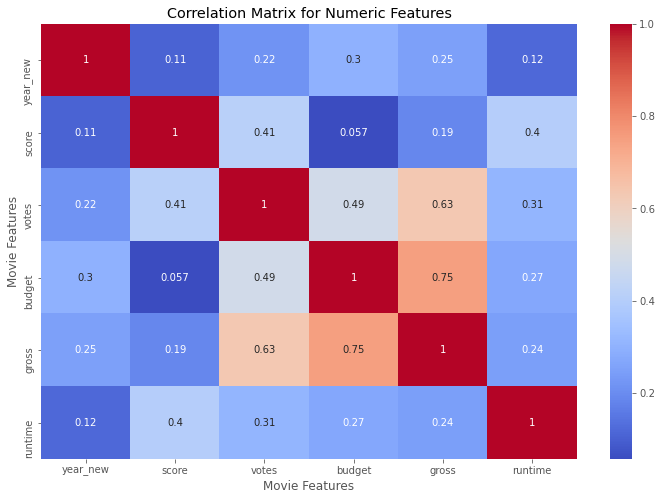

In [16]:
#Let's visualize our correlation matrix 
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
    #cmap colour more clearly defines correlations than the default
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
df.head()
#How can we determine correlation with columns such as 'name','genre','company', etc.?

,name,rating,genre,released,year_new,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009-12-18,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019-04-26,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997-12-19,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [18]:
df_numerized = df.copy()

#let's convert our categorical variables into numerical values
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,released,year_new,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009-12-18,2009,7.8,1100000,1137,1756,2283,55,237000000,2847246203,2208,162.0
7445,529,5,0,2019-04-26,2019,8.4,903000,160,729,2192,55,356000000,2797501328,1571,181.0
3045,6811,5,6,1997-12-19,1997,7.8,1100000,1137,1756,1560,55,200000000,2201647264,2208,194.0
6663,5075,5,0,2015-12-18,2015,7.8,876000,1107,2518,508,55,245000000,2069521700,1505,138.0
7244,530,5,0,2018-04-27,2018,8.4,897000,160,729,2192,55,321000000,2048359754,1571,149.0


In [19]:
#Looks like the for loop above worked correctly
    #our object columns are converted to numeric values 
df.head()
#comparing to our original dataframe

,name,rating,genre,released,year_new,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009-12-18,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019-04-26,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997-12-19,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


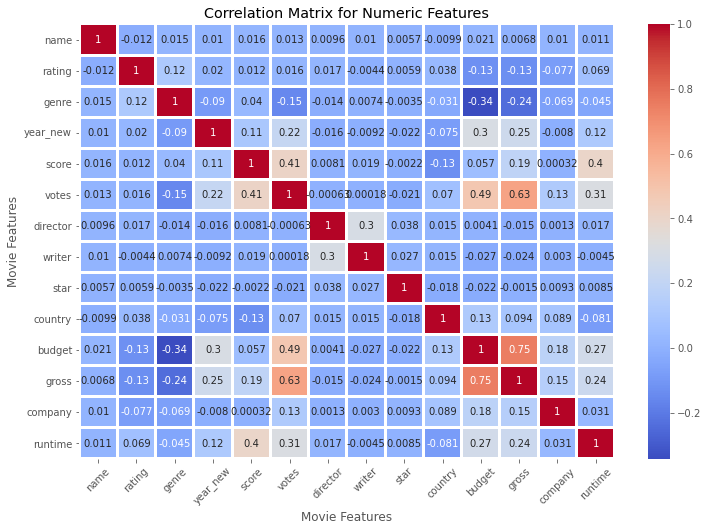

In [20]:
#Updated correlation matrix 
    #Including all columns from our numerized dataframe now 
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True,linewidths = 2, cmap = 'coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.xticks(rotation = 45)
plt.show()

In [42]:
#unstacking the data to more clearly see correlations between variables
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.011924
      genre       0.015300
      year_new    0.010174
      score       0.016181
dtype: float64

In [43]:
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs.head()

genre   budget   -0.342064
budget  genre    -0.342064
gross   genre    -0.240903
genre   gross    -0.240903
votes   genre    -0.148420
dtype: float64

In [44]:
high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]
high_corr.head()

#According to our Series, gross and budget have the highest correlation

gross   votes     0.632987
votes   gross     0.632987
budget  gross     0.750562
gross   budget    0.750562
name    name      1.000000
dtype: float64

## APPENDIX: Additional Work/Visualizations

### Visualizing Budget and Gross Revenue

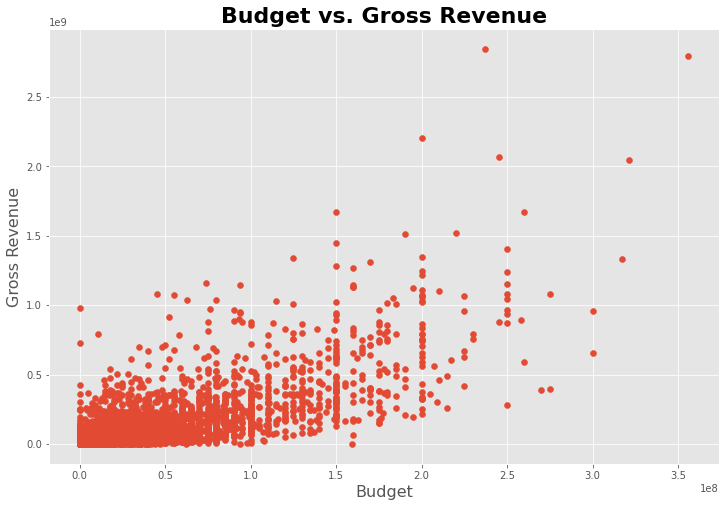

In [24]:
#Scatterplot with budget (x) and gross (y)

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Revenue',fontdict = {'size': 22, 'weight':'bold'})
plt.xlabel('Budget', fontdict = {'size': 16})
plt.ylabel('Gross Revenue', fontdict = {'size': 16})
plt.show()

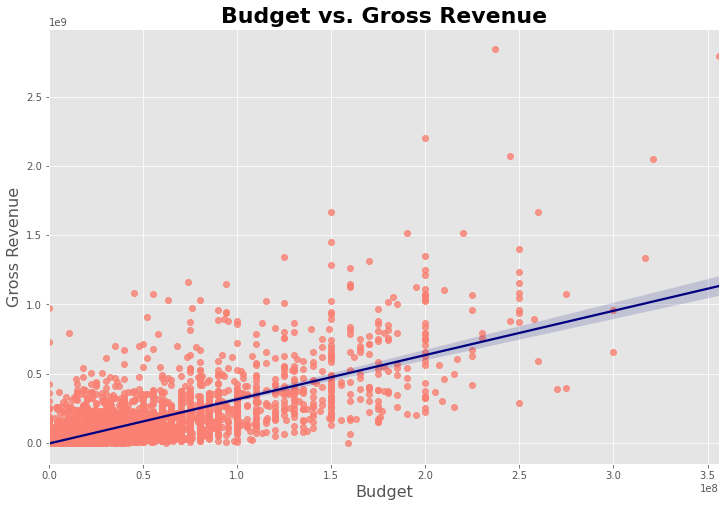

In [25]:
#Plot budget vs. gross revenue using seaborn package
sns.regplot(data = df, x = 'budget', y = 'gross', scatter_kws = {'color': 'salmon','alpha':0.8},
           line_kws = {'color': 'navy'})

plt.title('Budget vs. Gross Revenue',fontdict = {'size': 22, 'weight':'bold'})
plt.xlabel('Budget', fontdict = {'size': 16})
plt.ylabel('Gross Revenue', fontdict = {'size': 16})
plt.show()
#can see more clearly that there's a positive correlation between budget and gross revenue

### Grouping data by Genre

In [26]:
df.head()

,name,rating,genre,released,year_new,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009-12-18,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019-04-26,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997-12-19,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [27]:
genres = df.groupby(by = 'genre')
genres.size()
#top 3 genres in our data are (in order): 'Comedy','Action','Drama'

genre
Action       1695
Adventure     426
Animation     334
Biography     439
Comedy       2230
Crime         544
Drama        1476
Family         10
Fantasy        43
Horror        318
Music           1
Musical         1
Mystery        20
Romance         8
Sci-Fi          9
Sport           1
Thriller       16
Western         3
dtype: int64

In [36]:
#leaving out 'runtime' and 'year_new' columns
genres_group = genres[['score','votes','budget','gross']].mean().round(1)
genres_group

,score,votes,budget,gross
genre,,,,
Action,6.2,141264.1,48876290.9,143339860.4
Adventure,6.3,101223.6,35300610.3,107758471.9
Animation,6.8,128407.7,63302604.8,239188847.6
Biography,7.0,91217.6,18162092.9,47211448.7
Comedy,6.2,54609.6,15307301.0,43568332.5
Crime,6.7,91747.1,16630963.4,39181473.0
Drama,6.7,71184.2,13596595.5,38189037.2
Family,6.5,75340.0,20450000.0,215787647.6
Fantasy,6.0,59509.3,16423255.8,38338745.7


In [40]:
matplotlib.rcParams['figure.figsize'] = (22,10) #adjusting the size of the plots 

#function so I can visualize the different columns easily 
def genre_plot(y_value):
    sns.barplot(data = genres_group, x = genres_group.index, y = y_value), 
    plt.title('Movie {} by Genre'.format(y_value.title()),fontdict = {'size': 22, 'weight':'bold'}),
    plt.xlabel('Movie Genre', fontdict = {'size': 16}),
    plt.ylabel(y_value.title(), fontdict = {'size': 16}),
    return plt.show()

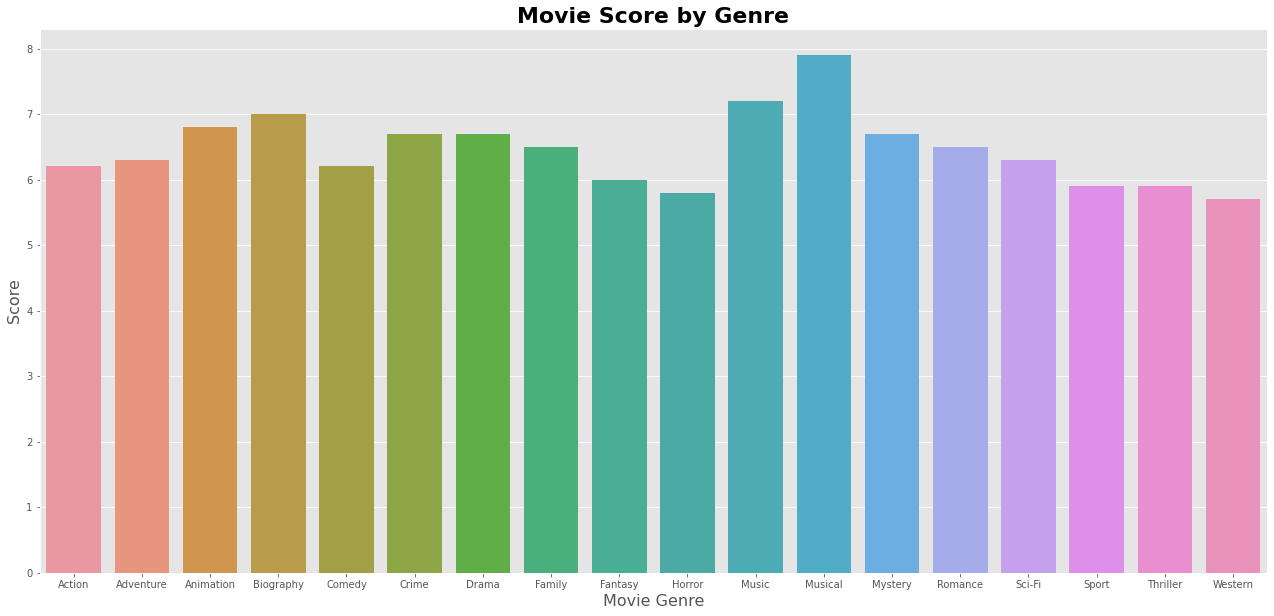

In [41]:
genre_plot('score')
#we can see 'Musical' and 'Music' have the highest average scores
    #keep in mind that they also had some of the lowest votes overall

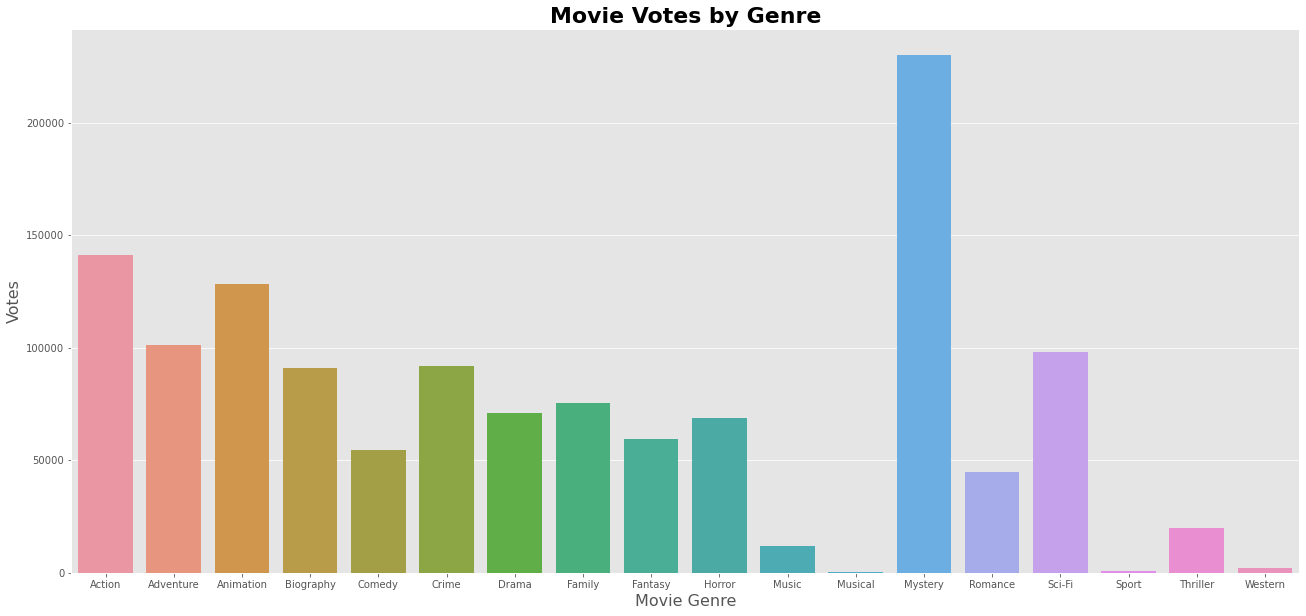

In [32]:
genre_plot('votes')
#'mystery' genre by far had the most amount of votes

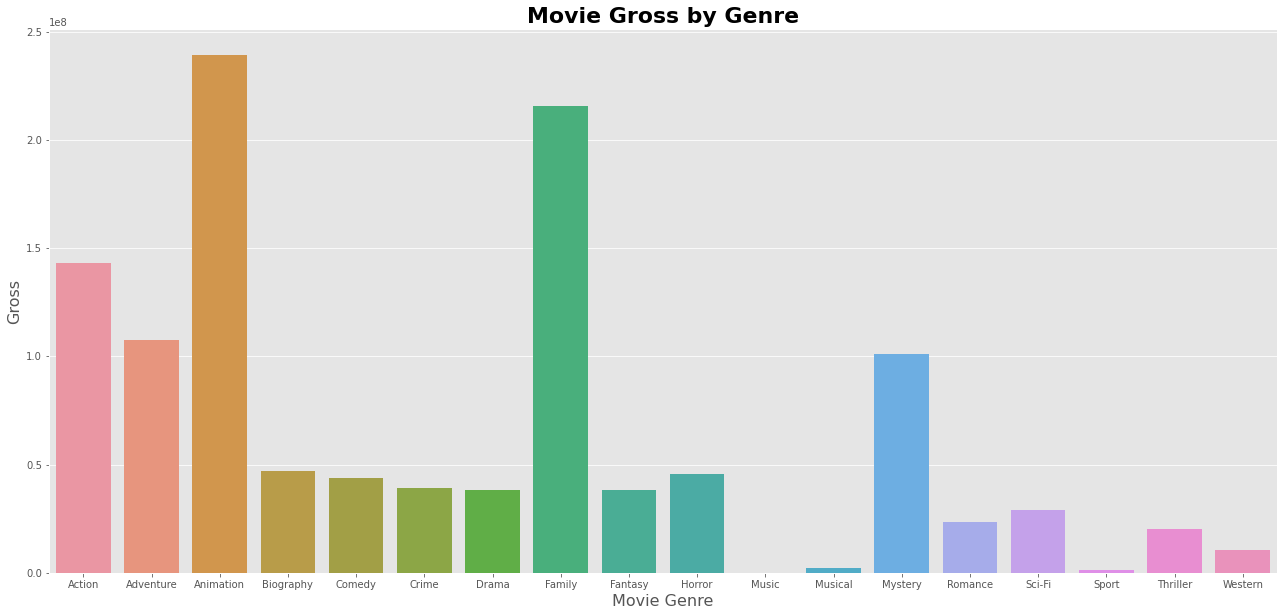

In [37]:
genre_plot('gross')
#'Animation' and 'Family' seem to have the highest average gross revenues 

In [33]:
agg_genres = genres.agg({'gross':['sum','mean','max'],
           'score': 'mean',
           'votes': 'mean'}).round(1)

agg_genres.sort_values(by = ('gross','sum'), ascending = False)

gross                          score     votes
                    sum         mean         max  mean      mean
genre                                                           
Action     242961063316  143339860.4  2847246203   6.2  141264.1
Comedy      97157381393   43568332.5   611257819   6.2   54609.6
Animation   79889075108  239188847.6  1670727580   6.8  128407.7
Drama       56367018968   38189037.2  2201647264   6.7   71184.2
Adventure   45905109017  107758471.9  1342321665   6.3  101223.6
Crime       21314721317   39181473.0  1074427370   6.7   91747.1
Biography   20725825978   47211448.7   911902649   7.0   91217.6
Horror      14542374576   45730737.7   701796444   5.8   68831.5
Family       2157876476  215787647.6  1264434525   6.5   75340.0
Mystery      2023670554  101183527.7   760006945   6.7  230125.8
Fantasy      1648566067   38338745.7   206071502   6.0   59509.3
Thriller      323223113   20201444.6    96258201   5.9   19930.7
Sci-Fi        260489866   28943318.4   161849455   6.3   98307.2
Romance       188394999   23549374.9   127869379   6.5   44596.8
Western        32025886   10675295.3    18289763   5.7    2066.3
Musical         2217255    2217255.0     2217255   7.9     321.0
Sport           1067629    1067629.0     1067629   5.9     691.0
Music            110014     110014.0      110014   7.2   12000.0

# Thanks for reading! 